1. Downloading NLTK resources...
Dataset loaded. Total rows: 732

2. Applying Text Preprocessing...
Preprocessing complete. Sample cleaned text:
0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: cleaned_text, dtype: object

3. Performing Sentiment Analysis and Classification...
Sentiment classification complete. Value counts:
predicted_sentiment
Neutral     348
Positive    277
Negative    107
Name: count, dtype: int64


/tmp/ipython-input-3395155525.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=bar_colors)


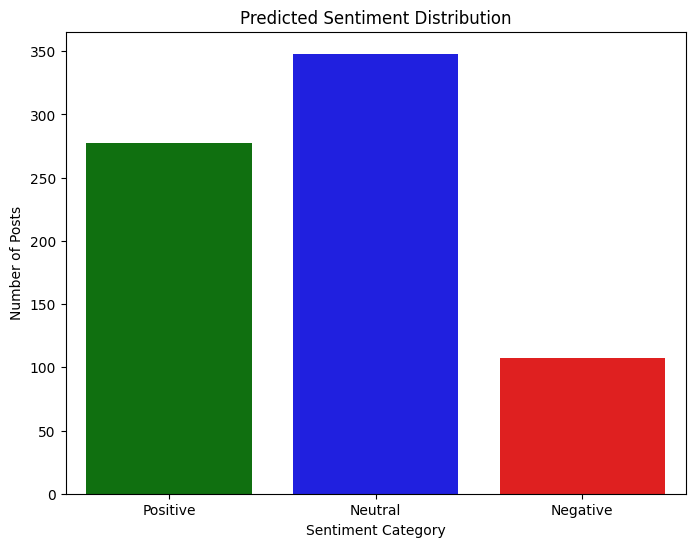


Visualization 1: Sentiment distribution plot saved as sentiment_distribution.png


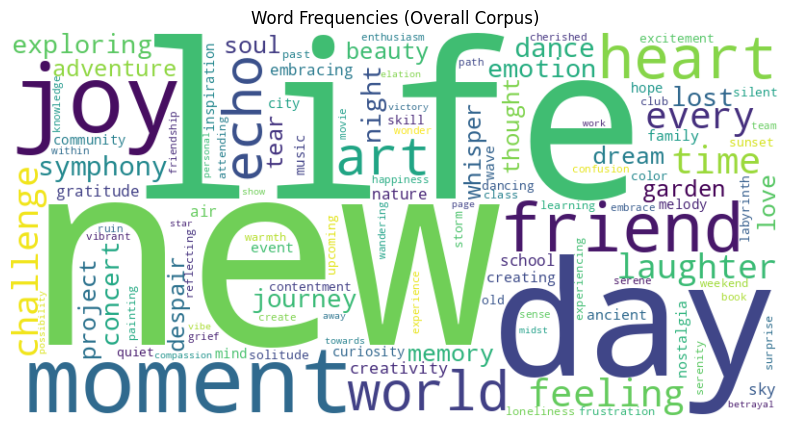

Visualization 2: Overall Word Cloud saved as word_cloud_overall.png


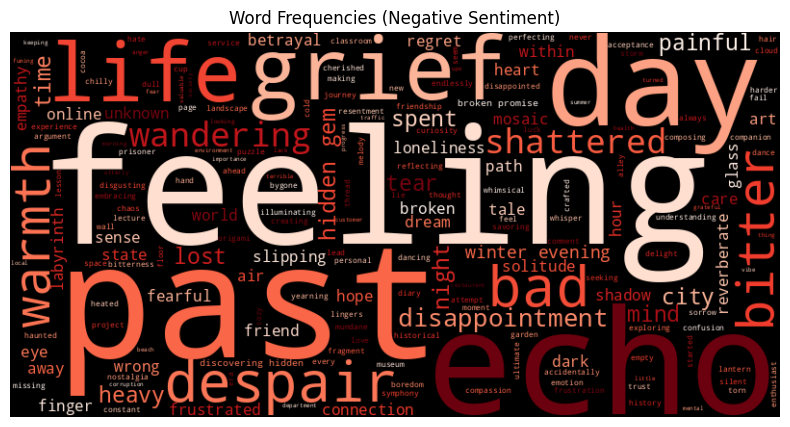

Visualization 3: Negative Word Cloud saved as word_cloud_negative.png


In [4]:
import pandas as pd
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# ====================================================================
# STEP 1: Setup and Data Loading
# ====================================================================

# Download necessary NLTK data (punkt, stopwords, wordnet)
# This step is essential for text processing.
print("1. Downloading NLTK resources...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset
file_path = '3) Sentiment dataset.csv'
try:
    # Use 'latin-1' encoding which is common for social media/review datasets
    df = pd.read_csv(file_path, encoding='latin-1')
except Exception as e:
    print(f"Error loading file: {e}. Please ensure the file is uploaded to Colab.")
    # Exit if file cannot be loaded
    exit()

# Identify the text column (based on previous inspection)
TEXT_COLUMN = 'Text'
print(f"Dataset loaded. Total rows: {len(df)}")


# ====================================================================
# STEP 2: Preprocessing (Tokenization, Stopwords, Lemmatization)
# ====================================================================

# Initialize Lemmatizer and Stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Cleans text: removes non-alphabetic chars, tokenizes, removes stopwords, and lemmatizes."""
    # Convert to string and handle non-alphabetic characters/lower case
    text = re.sub(r'[^a-zA-Z\s]', '', str(text), re.I|re.A).lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords Removal and Lemmatization
    processed_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]

    # Join tokens back into a single string for TextBlob
    return " ".join(processed_tokens)

print("\n2. Applying Text Preprocessing...")
df['cleaned_text'] = df[TEXT_COLUMN].apply(preprocess_text)
print("Preprocessing complete. Sample cleaned text:")
print(df['cleaned_text'].head())


# ====================================================================
# STEP 3: Sentiment Analysis and Classification
# ====================================================================

def get_polarity(text):
    """Returns the polarity score (-1.0 to 1.0) using TextBlob."""
    return TextBlob(text).sentiment.polarity

def classify_sentiment(score):
    """Classifies polarity score into Positive, Negative, or Neutral."""
    # Define thresholds for classification
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

print("\n3. Performing Sentiment Analysis and Classification...")
df['polarity_score'] = df['cleaned_text'].apply(get_polarity)
df['predicted_sentiment'] = df['polarity_score'].apply(classify_sentiment)

print("Sentiment classification complete. Value counts:")
print(df['predicted_sentiment'].value_counts())


# ====================================================================
# STEP 4: Visualization
# ====================================================================

# --- 4A: Visualize Sentiment Distribution ---
plt.figure(figsize=(8, 6))
sentiment_counts = df['predicted_sentiment'].value_counts()
# Ensure a specific order for better readability
sentiment_counts = sentiment_counts.reindex(['Positive', 'Neutral', 'Negative'])

# Define custom colors
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}
bar_colors = [colors[s] for s in sentiment_counts.index]

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=bar_colors)
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Posts')
plt.savefig('sentiment_distribution.png')
plt.show()
print("\nVisualization 1: Sentiment distribution plot saved as sentiment_distribution.png")

# --- 4B: Word Clouds (Overall Corpus) ---
all_text = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    colormap='viridis'
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Frequencies (Overall Corpus)')
plt.savefig('word_cloud_overall.png')
plt.show()
print("Visualization 2: Overall Word Cloud saved as word_cloud_overall.png")

# --- 4C: Word Clouds (Negative Sentiment - Optional but insightful) ---
negative_text = ' '.join(df[df['predicted_sentiment'] == 'Negative']['cleaned_text'])

if negative_text:
    neg_wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds'
    ).generate(negative_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(neg_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Frequencies (Negative Sentiment)')
    plt.savefig('word_cloud_negative.png')
    plt.show()
    print("Visualization 3: Negative Word Cloud saved as word_cloud_negative.png")
else:
    print("\nNo negative reviews found to generate a dedicated word cloud.")